# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Cities file
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:

record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 2 of set 0 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
City not found!
Processing record 3 of set 0 | anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 4 of set 0 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 5 of set 0 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 6 of set 0 | praia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 7 of set 0 | kodiak
http://api.openweathermap.

Processing record 7 of set 1 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 8 of set 1 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
City not found!
Processing record 9 of set 1 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 10 of set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 11 of set 1 | tromso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 12 of set 1 | turukhansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 13 of set 1 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb4

Processing record 14 of set 2 | caconda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 15 of set 2 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 16 of set 2 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 17 of set 2 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 18 of set 2 | pasni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 19 of set 2 | paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 20 of set 2 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing

Processing record 21 of set 3 | medea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 22 of set 3 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 23 of set 3 | makokou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 24 of set 3 | rodrigues alves
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 25 of set 3 | leh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 26 of set 3 | mount isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 27 of set 3 | bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processi

Processing record 28 of set 4 | halalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
City not found!
Processing record 29 of set 4 | merauke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 30 of set 4 | ngozi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 31 of set 4 | port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 32 of set 4 | sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 33 of set 4 | afmadu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
City not found!
Processing record 34 of set 4 | le portel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586

Processing record 34 of set 5 | bentiu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 35 of set 5 | velizh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 36 of set 5 | ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 37 of set 5 | korla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 38 of set 5 | mujiayingzi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 39 of set 5 | gamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 40 of set 5 | kashi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing recor

Processing record 41 of set 6 | along
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 42 of set 6 | codajas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 43 of set 6 | san vicente
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 44 of set 6 | halifax
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 45 of set 6 | malaut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 46 of set 6 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 47 of set 6 | baracoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Proces

Processing record 48 of set 7 | wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 49 of set 7 | neyshabur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 50 of set 7 | rawannawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
City not found!
Processing record 0 of set 8 | formoso do araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
City not found!
Processing record 1 of set 8 | kanel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 2 of set 8 | maralal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 3 of set 8 | zelion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612

Processing record 4 of set 9 | tezu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 5 of set 9 | stornoway
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 6 of set 9 | xiaoyi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 7 of set 9 | riobamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 8 of set 9 | atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 9 of set 9 | alugan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 10 of set 9 | chalons-en-champagne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing 

Processing record 10 of set 10 | lamar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 11 of set 10 | ghorawal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 12 of set 10 | san jeronimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 13 of set 10 | carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 14 of set 10 | tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 15 of set 10 | belyy yar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 16 of set 10 | lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed2

Processing record 16 of set 11 | ust-kuyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 17 of set 11 | burnie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 18 of set 11 | dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 19 of set 11 | viedma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 20 of set 11 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 21 of set 11 | la paz centro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 22 of set 11 | tokur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Pr

Processing record 22 of set 12 | ushibuka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 23 of set 12 | irati
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 24 of set 12 | taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 25 of set 12 | port hueneme
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 26 of set 12 | bayeux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 27 of set 12 | ulaanbaatar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Processing record 28 of set 12 | dumka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bd612ae7ba586cb45f4ed29071cacabb
Pr

In [34]:
# create a data frame from cities, temp, humidity, cloudiness and wind speed
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          601
Cloudiness    601
Country       601
Date          601
Humidity      601
Temp          601
Lat           601
Lng           601
Wind Speed    601
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
weather_data.describe()

,Cloudiness,Date,Humidity,Temp,Lat,Lng,Wind Speed
count,601.000000,6.010000e+02,601.000000,601.000000,601.000000,601.000000,601.000000
mean,51.252912,1.588985e+09,69.740433,62.764759,20.209850,16.797737,7.731148
std,42.091241,1.351612e+02,22.636972,17.952417,32.613604,88.686344,5.299113
min,0.000000,1.588985e+09,1.000000,8.100000,-54.800000,-175.200000,0.180000
25%,1.000000,1.588985e+09,58.000000,49.950000,-6.340000,-59.800000,3.470000
50%,54.000000,1.588985e+09,76.000000,65.050000,24.770000,20.870000,6.550000
75%,97.000000,1.588985e+09,88.000000,78.620000,46.830000,94.770000,10.290000
max,100.000000,1.588985e+09,100.000000,98.600000,78.220000,179.320000,35.320000


In [36]:
#  Get the indices of cities that have humidity over 100%.

#weather_data.loc[weather_data["Humidity"]>100

In [37]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# humid_level = 100

# clean_city_data = weather_data[(weather_data['Humidity'] >= humid_level)

# clean_city_data

In [38]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

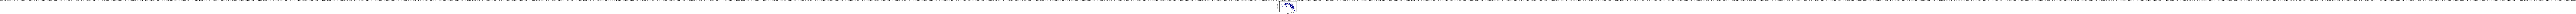

In [39]:
weather_data.plot(kind='scatter', x='Lat', y='Temp', c='DarkBlue')
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("../output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

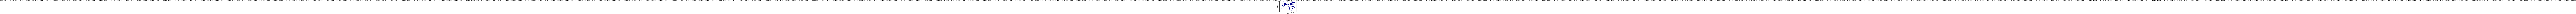

In [40]:
weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')
plt.title('City Latitude Vs Max Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

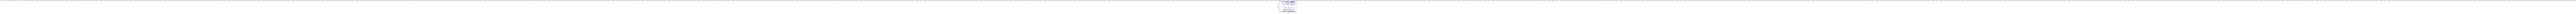

In [41]:
weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='DarkBlue')
plt.title('City Latitude Vs Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

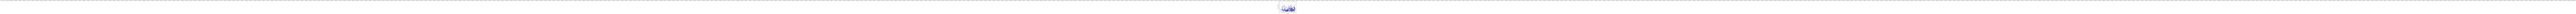

In [42]:
weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='DarkBlue')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression

In [43]:
# OPTIONAL: Create a function to create Linear Regression plots

In [44]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [47]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [49]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

NameError: name 'southern' is not defined

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [46]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)

NameError: name 'nothern' is not defined

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,9)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Sourhern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,11)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,33)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)